In [85]:
import numpy as np 
import pandas as pd
import torch

# 1. Loading Data

In [93]:
X_train = pd.read_csv("../Xtrain_hgcGIrA.csv")
y = pd.read_csv("../Ytrain_yL5OjS4.csv")

X_test = pd.read_csv("../Xtest.csv")
y_test = pd.read_csv("../Ysample_iX1anNa.csv")

In [94]:
X_train

,date,train,way,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3
0,2019-01-07,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.201,0.138,0.091
1,2019-01-08,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.204,0.152,0.106
2,2019-01-10,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.153,0.111
3,2019-01-11,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.152,0.108
4,2019-01-14,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.210,0.147,0.096
...,...,...,...,...,...,...,...,...,...,...,...,...
31114,2019-05-13,9,0,BE,08:00:00,2,0.152,0.18860,0.157000,0.080,0.100,NaN
31115,2019-05-14,9,0,BE,08:00:00,2,0.153,0.18040,0.191000,0.089,0.121,NaN
31116,2019-05-15,9,0,BE,08:00:00,2,0.166,0.14900,0.168000,0.099,0.129,NaN
31117,2019-03-21,9,0,BE,08:00:00,2,0.182,0.19300,0.162000,0.074,0.101,NaN


In [95]:
X = pd.concat([X_train, X_test], axis=0)
X.reset_index(drop=True, inplace=True)

In [96]:
X

,date,train,way,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3
0,2019-01-07,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.201,0.138,0.091
1,2019-01-08,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.204,0.152,0.106
2,2019-01-10,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.153,0.111
3,2019-01-11,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.152,0.108
4,2019-01-14,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.210,0.147,0.096
...,...,...,...,...,...,...,...,...,...,...,...,...
44866,2019-07-03,9,0,BE,08:00:00,2,0.121,0.145,0.15715,0.071,0.095,NaN
44867,2019-07-04,9,0,BE,08:00:00,2,0.144,0.139,0.15300,0.079,0.102,NaN
44868,2019-07-05,9,0,BE,08:00:00,2,0.128,0.137,0.12700,0.072,0.089,NaN
44869,2019-05-28,9,0,BE,08:00:00,2,0.164,0.187,0.15500,0.100,0.130,NaN


In [97]:
def transform(X):
    columns_to_delete = ['way', 'composition']
    X = X.drop(columns=columns_to_delete, axis=1)
    X['date'] = pd.to_datetime(X['date'], format='%Y-%m-%d')
    X['hour'] = pd.to_datetime(X['hour']).dt.hour
    X['day_of_week'] = X['date'].dt.dayofweek + 1
    X["Train_Station"] = X["train"].astype(str) + X["station"] + X["hour"].astype(str) + X["day_of_week"].astype(str)
    X=X.drop(["train","station", "hour", "day_of_week", "date"], axis=1)
    X = pd.get_dummies(X, columns=["Train_Station"])
    return X

In [98]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

imputer = IterativeImputer(estimator=BayesianRidge(), random_state=0)
data = transform(X)
columns = data[['p1q0','p2q0','p3q0','p0q1','p0q2','p0q3']].columns.tolist()
data[['p1q0','p2q0','p3q0','p0q1','p0q2','p0q3']] = pd.DataFrame(imputer.fit_transform(data[['p1q0','p2q0','p3q0','p0q1','p0q2','p0q3']]), columns=columns)

data.head()

C:\Users\khaba\AppData\Local\Temp\ipykernel_24180\2729836254.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X['hour'] = pd.to_datetime(X['hour']).dt.hour
c:\Users\khaba\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,Train_Station_10AD8.01,Train_Station_10AD8.02,Train_Station_10AD8.03,Train_Station_10AD8.04,...,Train_Station_9BD8.02,Train_Station_9BD8.03,Train_Station_9BD8.04,Train_Station_9BD8.05,Train_Station_9BE7.03,Train_Station_9BE8.01,Train_Station_9BE8.02,Train_Station_9BE8.03,Train_Station_9BE8.04,Train_Station_9BE8.05
0,0.207850,0.214416,0.268776,0.201,0.138,0.091,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.214606,0.220238,0.274366,0.204,0.152,0.106,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.216527,0.221786,0.278743,0.213,0.153,0.111,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.216596,0.221436,0.278083,0.213,0.152,0.108,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.215339,0.219218,0.274190,0.210,0.147,0.096,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [99]:
X = data

In [100]:
X.head()

,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,Train_Station_10AD8.01,Train_Station_10AD8.02,Train_Station_10AD8.03,Train_Station_10AD8.04,...,Train_Station_9BD8.02,Train_Station_9BD8.03,Train_Station_9BD8.04,Train_Station_9BD8.05,Train_Station_9BE7.03,Train_Station_9BE8.01,Train_Station_9BE8.02,Train_Station_9BE8.03,Train_Station_9BE8.04,Train_Station_9BE8.05
0,0.207850,0.214416,0.268776,0.201,0.138,0.091,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.214606,0.220238,0.274366,0.204,0.152,0.106,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.216527,0.221786,0.278743,0.213,0.153,0.111,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.216596,0.221436,0.278083,0.213,0.152,0.108,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.215339,0.219218,0.274190,0.210,0.147,0.096,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [101]:
X_train = X.head(31119)
X_test = X.tail(len(X) - 31119)

In [102]:
X_train

,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,Train_Station_10AD8.01,Train_Station_10AD8.02,Train_Station_10AD8.03,Train_Station_10AD8.04,...,Train_Station_9BD8.02,Train_Station_9BD8.03,Train_Station_9BD8.04,Train_Station_9BD8.05,Train_Station_9BE7.03,Train_Station_9BE8.01,Train_Station_9BE8.02,Train_Station_9BE8.03,Train_Station_9BE8.04,Train_Station_9BE8.05
0,0.207850,0.214416,0.268776,0.201,0.138,0.091000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.214606,0.220238,0.274366,0.204,0.152,0.106000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.216527,0.221786,0.278743,0.213,0.153,0.111000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.216596,0.221436,0.278083,0.213,0.152,0.108000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.215339,0.219218,0.274190,0.210,0.147,0.096000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31114,0.152000,0.188600,0.157000,0.080,0.100,0.090087,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
31115,0.153000,0.180400,0.191000,0.089,0.121,0.112281,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
31116,0.166000,0.149000,0.168000,0.099,0.129,0.114601,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
31117,0.182000,0.193000,0.162000,0.074,0.101,0.088046,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [83]:
y

,Unnamed: 0,p0q0
0,1,0.216
1,2,0.216
2,3,0.227
3,4,0.229
4,5,0.225
...,...,...
31114,31115,0.111
31115,31116,0.143
31116,31117,0.139
31117,31118,0.117


In [84]:
Ytrain = y.drop(["Unnamed: 0"], axis=1)
Ytrain

,p0q0
0,0.216
1,0.216
2,0.227
3,0.229
4,0.225
...,...
31114,0.111
31115,0.143
31116,0.139
31117,0.117


# Training Model : 

In [71]:
X_test = X_test.astype(np.float32)
X_train = X_train.astype(np.float32)
y = y.astype(np.float32)

In [72]:
y

,p0q0
0,0.216
1,0.216
2,0.227
3,0.229
4,0.225
...,...
31114,0.111
31115,0.143
31116,0.139
31117,0.117


In [73]:
X_train = torch.from_numpy(X_train.values)
X_test = torch.from_numpy(X_test.values)
y = torch.from_numpy(y.values).reshape(-1,1)

In [74]:
print("X_train.shape:",X_train.shape)
print("x_test.shape:",X_test.shape)
print("Y_train.shape:",y.shape)

X_train.shape: torch.Size([31119, 9])
x_test.shape: torch.Size([13752, 9])
Y_train.shape: torch.Size([31119, 1])


In [75]:
y

tensor([[0.2160],
        [0.2160],
        [0.2270],
        ...,
        [0.1390],
        [0.1170],
        [0.4160]])

In [86]:
from TF import evaluate_model, train_network

In [87]:
import torch.nn as nn

In [88]:
class LinearR(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        self.sigmoid = nn.Sigmoid() 

    def forward(self, x):
        out = self.linear(x)
        out = self.sigmoid(out)
        return out

In [89]:
import torch
import numpy as np, pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score,roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [90]:
num_epochs = 500
batch_size = 128
loss_function = nn.BCELoss()

In [91]:
weight_decay = 0.0 #set to 0; no L2 Regularizer; passed into the Optimizer
lambda_L1=0.0 #Set to 0; no L1 reg; manually added in loss (train_network)

In [92]:
model = LinearR(9, 1)

In [93]:
adam_optimizer = torch.optim.Adam(model.parameters(), lr= 0.001, weight_decay=weight_decay)

In [94]:
adam_loss = train_network(model, adam_optimizer, loss_function ,num_epochs,batch_size, X_train,y,lambda_L1=0.0)

Epoch: 0 - Loss:0.7428
Epoch: 10 - Loss:0.5282
Epoch: 20 - Loss:0.5160
Epoch: 30 - Loss:0.5127
Epoch: 40 - Loss:0.5119
Epoch: 50 - Loss:0.5115
Epoch: 60 - Loss:0.5113
Epoch: 70 - Loss:0.5110
Epoch: 80 - Loss:0.5109
Epoch: 90 - Loss:0.5107
Epoch: 100 - Loss:0.5106
Epoch: 110 - Loss:0.5105
Epoch: 120 - Loss:0.5104
Epoch: 130 - Loss:0.5104
Epoch: 140 - Loss:0.5103
Epoch: 150 - Loss:0.5103
Epoch: 160 - Loss:0.5102
Epoch: 170 - Loss:0.5102
Epoch: 180 - Loss:0.5102
Epoch: 190 - Loss:0.5102
Epoch: 200 - Loss:0.5101
Epoch: 210 - Loss:0.5101
Epoch: 220 - Loss:0.5101
Epoch: 230 - Loss:0.5101
Epoch: 240 - Loss:0.5101
Epoch: 250 - Loss:0.5101
Epoch: 260 - Loss:0.5101
Epoch: 270 - Loss:0.5101
Epoch: 280 - Loss:0.5101
Epoch: 290 - Loss:0.5101
Epoch: 300 - Loss:0.5100
Epoch: 310 - Loss:0.5100
Epoch: 320 - Loss:0.5100
Epoch: 330 - Loss:0.5100
Epoch: 340 - Loss:0.5100
Epoch: 350 - Loss:0.5100
Epoch: 360 - Loss:0.5100
Epoch: 370 - Loss:0.5100
Epoch: 380 - Loss:0.5100
Epoch: 390 - Loss:0.5100
Epoch: 400 

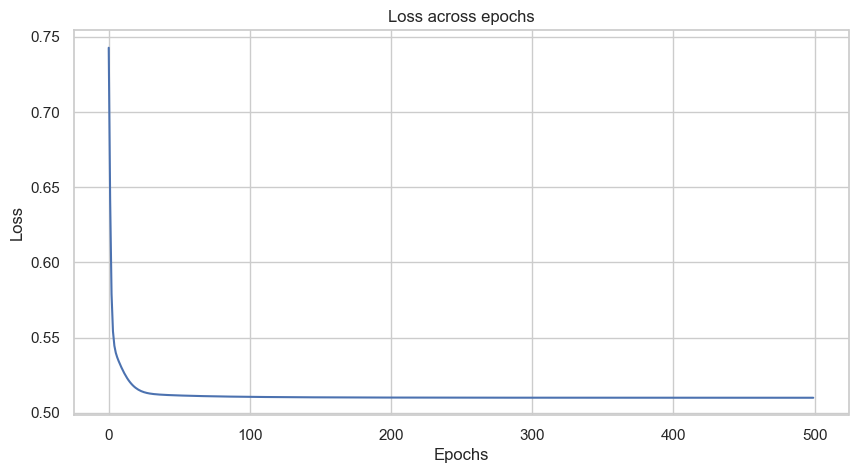

In [98]:
plt.figure(figsize=(10, 5))
plt.plot(adam_loss)
plt.title('Loss across epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [99]:
with torch.no_grad():
    predictions = model(X_test)

print(predictions)

tensor([[0.2339],
        [0.2294],
        [0.2356],
        ...,
        [0.1162],
        [0.1351],
        [0.1214]])


In [100]:
predictions_df = pd.DataFrame({'Predictions': predictions.numpy().flatten()})
predictions_df.index = predictions_df.index + 1
predictions_df.to_csv('predictions_NoReg.csv', index=True)

In [101]:
#Set to 0; no L2 reg
weight_decay=0.0 

#Enables L1 Regularization
lambda_L1 = 0.0001 

model = LinearR(9, 1)

#Binary Crosss Entropy Loss
loss_function = nn.BCELoss()
 
adam_optimizer = torch.optim.Adam(model.parameters(),lr= 0.001 ,weight_decay=weight_decay)

In [102]:
adam_loss = train_network(model,adam_optimizer,loss_function, num_epochs,batch_size,X_train,y ,lambda_L1=lambda_L1)

Epoch: 0 - Loss:1.0583
Epoch: 10 - Loss:0.5236
Epoch: 20 - Loss:0.5153
Epoch: 30 - Loss:0.5135
Epoch: 40 - Loss:0.5129
Epoch: 50 - Loss:0.5126
Epoch: 60 - Loss:0.5123
Epoch: 70 - Loss:0.5120
Epoch: 80 - Loss:0.5118
Epoch: 90 - Loss:0.5117
Epoch: 100 - Loss:0.5115
Epoch: 110 - Loss:0.5114
Epoch: 120 - Loss:0.5113
Epoch: 130 - Loss:0.5112
Epoch: 140 - Loss:0.5112
Epoch: 150 - Loss:0.5111
Epoch: 160 - Loss:0.5111
Epoch: 170 - Loss:0.5110
Epoch: 180 - Loss:0.5110
Epoch: 190 - Loss:0.5110
Epoch: 200 - Loss:0.5110
Epoch: 210 - Loss:0.5109
Epoch: 220 - Loss:0.5109
Epoch: 230 - Loss:0.5109
Epoch: 240 - Loss:0.5109
Epoch: 250 - Loss:0.5109
Epoch: 260 - Loss:0.5109
Epoch: 270 - Loss:0.5109
Epoch: 280 - Loss:0.5109
Epoch: 290 - Loss:0.5109
Epoch: 300 - Loss:0.5109
Epoch: 310 - Loss:0.5109
Epoch: 320 - Loss:0.5108
Epoch: 330 - Loss:0.5108
Epoch: 340 - Loss:0.5108
Epoch: 350 - Loss:0.5108
Epoch: 360 - Loss:0.5108
Epoch: 370 - Loss:0.5108
Epoch: 380 - Loss:0.5108
Epoch: 390 - Loss:0.5108
Epoch: 400 

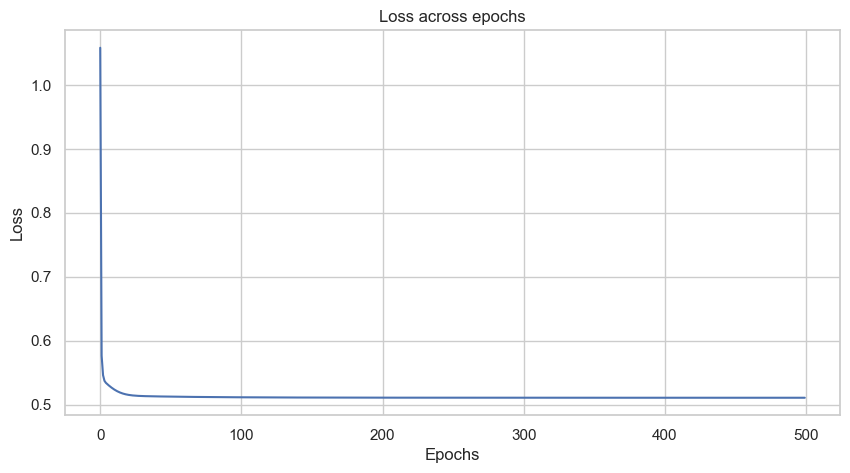

In [103]:
plt.figure(figsize=(10, 5))
plt.plot(adam_loss)
plt.title('Loss across epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [104]:
with torch.no_grad():
    predictions = model(X_test)

print(predictions)

tensor([[0.2368],
        [0.2323],
        [0.2384],
        ...,
        [0.1167],
        [0.1356],
        [0.1218]])


In [105]:
predictions_df = pd.DataFrame({'Predictions': predictions.numpy().flatten()})
predictions_df.index = predictions_df.index + 1
predictions_df.to_csv('predictions_RegL1.csv', index=True)

In [ ]:
num_epochs = 500
batch_size= 128
weight_decay=0.001 #Enables L2 Regularization
lambda_L1 = 0.00 #Set to 0; no L1 reg

In [106]:
model = LinearR(9, 1)
loss_function = nn.BCELoss() #Binary Crosss Entropy Loss

In [107]:
adam_optimizer = torch.optim.Adam(model.parameters(),lr= 0.001, weight_decay=weight_decay)

In [108]:
adam_loss = train_network(model,adam_optimizer,loss_function, num_epochs,batch_size,X_train,y,lambda_L1=lambda_L1)

Epoch: 0 - Loss:2.4702
Epoch: 10 - Loss:0.5383
Epoch: 20 - Loss:0.5202
Epoch: 30 - Loss:0.5143
Epoch: 40 - Loss:0.5130
Epoch: 50 - Loss:0.5126
Epoch: 60 - Loss:0.5123
Epoch: 70 - Loss:0.5121
Epoch: 80 - Loss:0.5119
Epoch: 90 - Loss:0.5117
Epoch: 100 - Loss:0.5116
Epoch: 110 - Loss:0.5114
Epoch: 120 - Loss:0.5114
Epoch: 130 - Loss:0.5113
Epoch: 140 - Loss:0.5112
Epoch: 150 - Loss:0.5112
Epoch: 160 - Loss:0.5111
Epoch: 170 - Loss:0.5111
Epoch: 180 - Loss:0.5110
Epoch: 190 - Loss:0.5110
Epoch: 200 - Loss:0.5110
Epoch: 210 - Loss:0.5110
Epoch: 220 - Loss:0.5109
Epoch: 230 - Loss:0.5109
Epoch: 240 - Loss:0.5109
Epoch: 250 - Loss:0.5109
Epoch: 260 - Loss:0.5109
Epoch: 270 - Loss:0.5109
Epoch: 280 - Loss:0.5109
Epoch: 290 - Loss:0.5109
Epoch: 300 - Loss:0.5109
Epoch: 310 - Loss:0.5109
Epoch: 320 - Loss:0.5109
Epoch: 330 - Loss:0.5109
Epoch: 340 - Loss:0.5108
Epoch: 350 - Loss:0.5108
Epoch: 360 - Loss:0.5108
Epoch: 370 - Loss:0.5108
Epoch: 380 - Loss:0.5108
Epoch: 390 - Loss:0.5108
Epoch: 400 

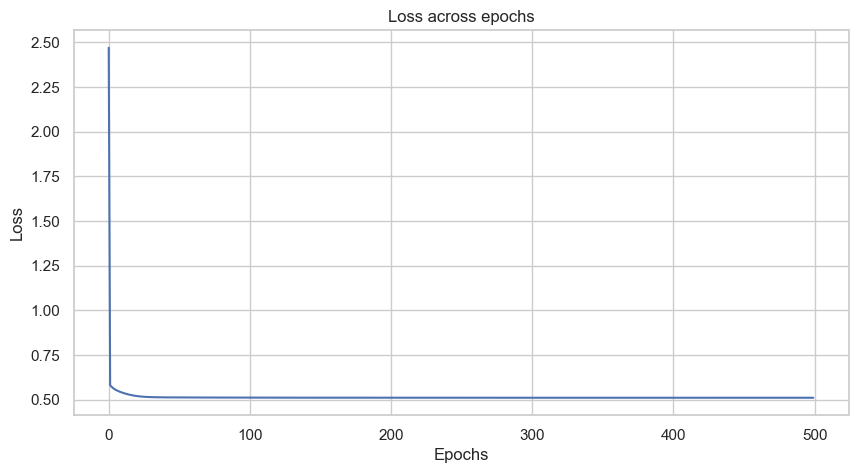

In [109]:
plt.figure(figsize=(10, 5))
plt.plot(adam_loss)
plt.title('Loss across epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [110]:
with torch.no_grad():
    predictions = model(X_test)

print(predictions)

tensor([[0.2366],
        [0.2322],
        [0.2383],
        ...,
        [0.1167],
        [0.1355],
        [0.1217]])


In [111]:
predictions_df = pd.DataFrame({'Predictions': predictions.numpy().flatten()})
predictions_df.index = predictions_df.index + 1
predictions_df.to_csv('predictions_RegL2.csv', index=True)

In [113]:
num_epochs = 500
batch_size= 128
lambda_L1 = 0.0001 #Enabled L1
weight_decay =0.001 #Enabled L2
model = LinearR(9, 1)
loss_function = nn.BCELoss()

In [114]:
adam_optimizer = torch.optim.Adam(model.parameters(), lr= 0.001, weight_decay=weight_decay)

In [115]:
adam_loss = train_network(model,adam_optimizer,loss_function ,num_epochs,batch_size,X_train,y,lambda_L1=lambda_L1)

Epoch: 0 - Loss:0.8569
Epoch: 10 - Loss:0.5264
Epoch: 20 - Loss:0.5173
Epoch: 30 - Loss:0.5147
Epoch: 40 - Loss:0.5140
Epoch: 50 - Loss:0.5136
Epoch: 60 - Loss:0.5133
Epoch: 70 - Loss:0.5131
Epoch: 80 - Loss:0.5130
Epoch: 90 - Loss:0.5129
Epoch: 100 - Loss:0.5128
Epoch: 110 - Loss:0.5127
Epoch: 120 - Loss:0.5127
Epoch: 130 - Loss:0.5126
Epoch: 140 - Loss:0.5126
Epoch: 150 - Loss:0.5126
Epoch: 160 - Loss:0.5125
Epoch: 170 - Loss:0.5125
Epoch: 180 - Loss:0.5125
Epoch: 190 - Loss:0.5125
Epoch: 200 - Loss:0.5125
Epoch: 210 - Loss:0.5125
Epoch: 220 - Loss:0.5125
Epoch: 230 - Loss:0.5125
Epoch: 240 - Loss:0.5125
Epoch: 250 - Loss:0.5124
Epoch: 260 - Loss:0.5124
Epoch: 270 - Loss:0.5124
Epoch: 280 - Loss:0.5124
Epoch: 290 - Loss:0.5124
Epoch: 300 - Loss:0.5124
Epoch: 310 - Loss:0.5124
Epoch: 320 - Loss:0.5124
Epoch: 330 - Loss:0.5124
Epoch: 340 - Loss:0.5124
Epoch: 350 - Loss:0.5124
Epoch: 360 - Loss:0.5124
Epoch: 370 - Loss:0.5124
Epoch: 380 - Loss:0.5124
Epoch: 390 - Loss:0.5124
Epoch: 400 

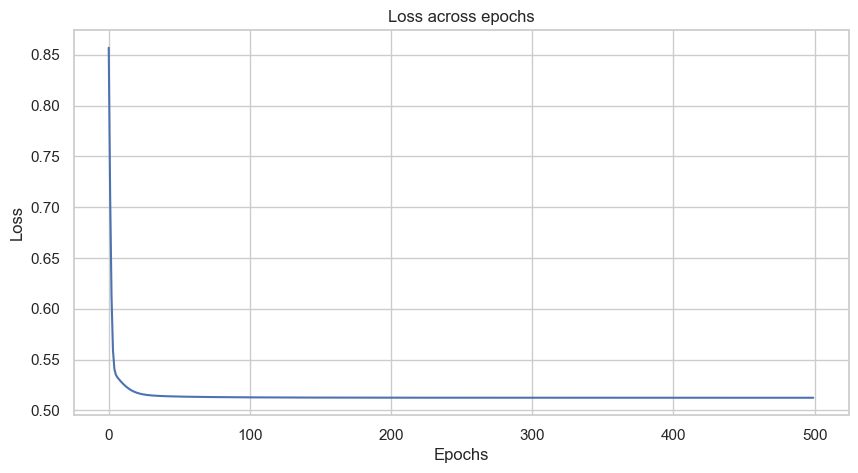

In [116]:
plt.figure(figsize=(10, 5))
plt.plot(adam_loss)
plt.title('Loss across epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [117]:
with torch.no_grad():
    predictions = model(X_test)

print(predictions)

tensor([[0.2527],
        [0.2483],
        [0.2554],
        ...,
        [0.1301],
        [0.1502],
        [0.1355]])


In [118]:
predictions_df = pd.DataFrame({'Predictions': predictions.numpy().flatten()})
predictions_df.index = predictions_df.index + 1
predictions_df.to_csv('predictions_RegL1AndL2.csv', index=True)